In [1]:
%matplotlib inline
import numpy as np
import numpy.random as rng
import pylab as pl

def sigmoid(phi):
    return 1.0/(1.0 + np.exp(-phi))

In [2]:
Npats, Nins = 100, 2
X = 5*rng.normal(1,1,size=(Npats,Nins))
w_truth = rng.normal(0,1,size=(Nins))
m_truth = rng.normal(1,1,size=(Nins))
phi = np.dot(X - m_truth, w_truth)
Targ = np.where(phi > 0.0, 1, 0)

In [3]:
def show_result():
    pl.clf()
    msize = 8
    cl ={0:'red', 1:'black'}
    for i, x in enumerate(X):
        pl.plot(x[0],x[1],'x',color=cl[int(Targ[i])],alpha=.4,markersize=msize)
        pl.plot(x[0],x[1],'o',color=cl[int(Targ[i])],alpha=1.-float(abs(Targ[i]-Y[i])),markersize=msize)
        
    pl.axis('equal')
    pl.arrow(0, 0, m[0], m[1], head_width=0.5, head_length=0.5, fc='b', ec='b', linewidth=3, alpha=.7)
    pl.arrow(m[0]-w[0], m[1]-w[1], w[0], w[1], head_width=25.0, head_length=1.0, fc='g', ec='g', linewidth=1, alpha=.35)
    pl.show()

  

## Learning, starting from random weights and bias.

### Initialise to random values so we're not 'cheating'

In [4]:
init_w = rng.normal(0,1,size=(Nins))
init_m = 4.*rng.normal(0,1,size=(Nins))
rate = 0.1 / Npats

Red and Black are target 0 and 1 patterns respectively.

They will get "filled in" once the perceptron is getting them correct.

In [5]:
def do_one_step(w,m,X,Targ,rate):
    phi = np.dot(X-m,w) 
    Y = sigmoid(phi)  # Sigmoid perceptron ('logistic regression')
    dw = (np.sum(np.atleast_2d(Targ-Y).T*(X-m), axis=0))
    dm = -(np.sum(np.atleast_2d(Targ-Y).T*w, axis=0))
    w = w + rate * dw   # one step of learning
    m = m + rate * dm   # one step of learning
    return (w,m,Y)

In [6]:
w,m,Y = do_one_step(init_w,init_m,X,Targ,0.0)
print('loss: ', np.sum(Targ*np.log(Y) + (1-Targ)*np.log(1-Y)))
print(w,m)

loss:  -121.50057171
[-0.15907734 -0.06873756] [ 4.84256158 -4.37886484]


#### Each execution of the next cell does one 'step' of learning.


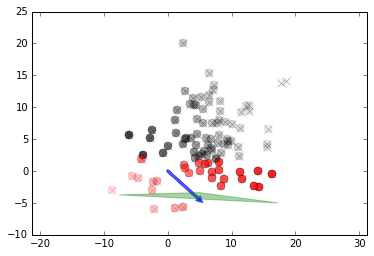

[ 0.02390459  0.47078098] [ 4.84827146 -4.37639759]
loss:  -121.50057171


In [7]:
w,m,Y = do_one_step(w,m,X,Targ,rate)
show_result()
print(w,m)
print('loss: ', np.sum(Targ*np.log(Y) + (1-Targ)*np.log(1-Y)))

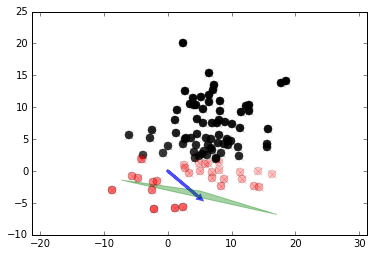

[ 0.04590098  0.20762367] [ 4.90197572 -4.11778476]
loss:  -40.6056035471


In [8]:
for t in range(100):
    w,m,Y = do_one_step(w,m,X,Targ,rate)
show_result()
print(w,m)
print('loss: ', np.sum(Targ*np.log(Y) + (1-Targ)*np.log(1-Y)))


# now try via autograd instead!


In [67]:
import autograd.numpy as np
from autograd import grad

# Define a function that returns a loss...
def training_loss(params):
    tildex = X - params['mean']
    zvec = params['wgts']/np.sqrt(np.sum(np.power(params['wgts'],2.)))
    # zvec should be unit length: CHECK IT.
    Dr2 = np.power(np.dot(tildex, zvec), 2.0)
    L2X = (np.power(tildex, 2.0)).sum(1)
    DR2 = L2X - Dr2
    membership = np.exp(-0.5*((Dr2/params['r2']) + (DR2/params['R2'])))
    membership = np.array(membership)
    #print(membership)
    #membership = 1.0 # default test, makes vanilla perceptron
    phi = np.dot(tildex, params['wgts'])
    Y = sigmoid(phi)  # Sigmoid perceptron ('logistic regression')

    #Y = sigmoid(np.dot(X-params['mean'],params['wgts'])).reshape(Npats,1)
    loss = np.sum(membership*(Targ*np.log(Y) + (1-Targ)*np.log(1-Y)))
    return loss

training_loss_gradient = grad(training_loss)

In [68]:
params = {'wgts':init_w, 'mean':init_m, 'r2':25.0, 'R2':25.0}
print("Initial params:")
for key in params.keys():
    print(key,'\t', params[key])
print("Initial loss:", training_loss(params))

Initial params:
mean 	 [ 4.84256158 -4.37886484]
wgts 	 [-0.15907734 -0.06873756]
R2 	 25.0
r2 	 25.0
Initial loss: -17.0932465532


In [69]:
def do_one_autograd_step(params,X,Targ,rate):
    phi = np.dot(X-params['mean'], params['wgts']) 
    Y = sigmoid(phi)  # Sigmoid perceptron ('logistic regression')
    grads = training_loss_gradient(params)
    params['wgts'] = params['wgts'] + rate * grads['wgts']   # one step of learning
    params['mean'] = params['mean'] + rate * grads['mean']   # one step of learning
    return (params,Y)

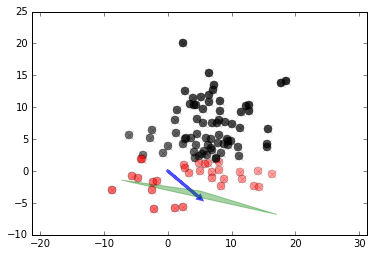

{'mean': array([ 4.82580085, -4.61070588]), 'wgts': array([ 0.03421142,  0.05665734]), 'R2': 25.0, 'r2': 25.0}
vanilla loss:  -52.4790494354
loss: -12.8945230086


In [70]:
for t in range(100):
    params,Y = do_one_autograd_step(params,X,Targ,rate)
show_result()
print(params)
print('vanilla loss: ', np.sum(Targ*np.log(Y) + (1-Targ)*np.log(1-Y)))
print("loss:", training_loss(params))